# AI-generated notebook for Dandiset 001363

**NOTE:** This notebook was automatically generated using *dandi-notebook-gen* and has not been fully verified for scientific accuracy. Please exercise caution and validate all analysis performed below before drawing any scientific conclusions.

---

# Introduction

**Title:** Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound  
**Dandiset ID:** 001363  
**Version:** draft  
**Description:**  
In this study, researchers investigate neuronal response to transcranial focused ultrasound stimulation (tFUS) on the rat somatosensory cortex with ultraflexible nanoelectrodes. The study varies ultrasound intensity, duty cycle, and pulse repetition frequency (PRF). Data include raw extracellular recordings from chronically implanted electrodes, across 500 trials.  

**License:** CC-BY-4.0  
**Citation:** Ramachandran et al. (2025), DANDI Archive. [doi link](https://dandiarchive.org/dandiset/001363/draft)

---

# %% [markdown]
## Accessing the Dandiset via DANDI API

Below we list all assets contained in this Dandiset using the `dandi` Python client:

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

for asset in assets[:10]:  # Show first 10 assets info
    print("Asset ID:", asset.identifier)
    print("Path:", asset.path)
    print("Size (bytes):", asset.size)
    print("---")

Asset ID: b8de194c-d6ad-42e4-9e8f-bddffd2dc86b
Path: sub-BH643/sub-BH643_ecephys.nwb
Size (bytes): 3186023744
---
Asset ID: 9ea6378c-dedd-4ce5-b48f-aafc79f623a3
Path: sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb
Size (bytes): 2995706696
---
Asset ID: 379bb4ac-f2e4-4fef-b71e-41b698e8becc
Path: sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb
Size (bytes): 3154042176
---
Asset ID: 3bae23ed-bc59-4f75-bc1a-258ae0bf0af8
Path: sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb
Size (bytes): 3186023744
---
Asset ID: 029b8fdb-d0b8-4198-9a8d-683e0cfd731a
Path: sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb
Size (bytes): 3185237288
---
Asset ID: 6a0058c7-f8e8-4f1f-84b9-eb45dc8971a2
Path: sub-BH643/sub-BH643_ses-20241220T184135_ecephys.nwb
Size (bytes): 3151945024
---
Asset ID: 87167364-17c2-45ab-9bad-31c14c62b6e9
Path: sub-BH643/sub-BH643_ses-20241220T192930_ecephys.nwb
Size (bytes): 312806912
---
Asset ID: 581d3bd2-382f-41dc-a6f9-7b14d1184937
Path: sub-BH643/sub-BH643_ses-202412

The Dandiset contains **55 NWB files**, each corresponding to a separate recording session.

## Loading and exploring a sample NWB file

We'll select the first NWB file to explore:

```
sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb
```

The full download URL:
```
https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/
```

The following loads metadata and small snippets of the data **without downloading the whole file**, using the [`remfile`](https://pypi.org/project/remfile/), `h5py`, and `pynwb` libraries.

In [2]:
import remfile
import h5py
import pynwb

nwb_url = "https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/"
file = remfile.File(nwb_url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwb = io.read()

# Basic metadata
print("Subject ID:", getattr(nwb.subject, 'subject_id', 'N/A'))
print("Species:", getattr(nwb.subject, 'species', 'N/A'))
print("Age:", getattr(nwb.subject, 'age', 'N/A'))
print("Sex:", getattr(nwb.subject, 'sex', 'N/A'))

print("Number of trials:", len(nwb.trials))
print("Number of electrodes:", len(nwb.electrodes.id))

# Try listing electrode column names
print("Electrode metadata cols:", nwb.electrodes.colnames)

Subject ID: BH589
Species: Rattus norvegicus
Age: P24W
Sex: M
Number of trials: 500
Number of electrodes: 32
Electrode metadata cols: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Plotting filtered signal from multiple channels

The snippet below loads a short 50 ms window and performs bandpass filtering (300-3000 Hz) on multiple channels.
This can highlight spike-like transients, if they exist.

*Note: The signals here appear mostly dominated by broadband noise rather than clear spikes, but this plot summarizes multi-channel activity variability.*

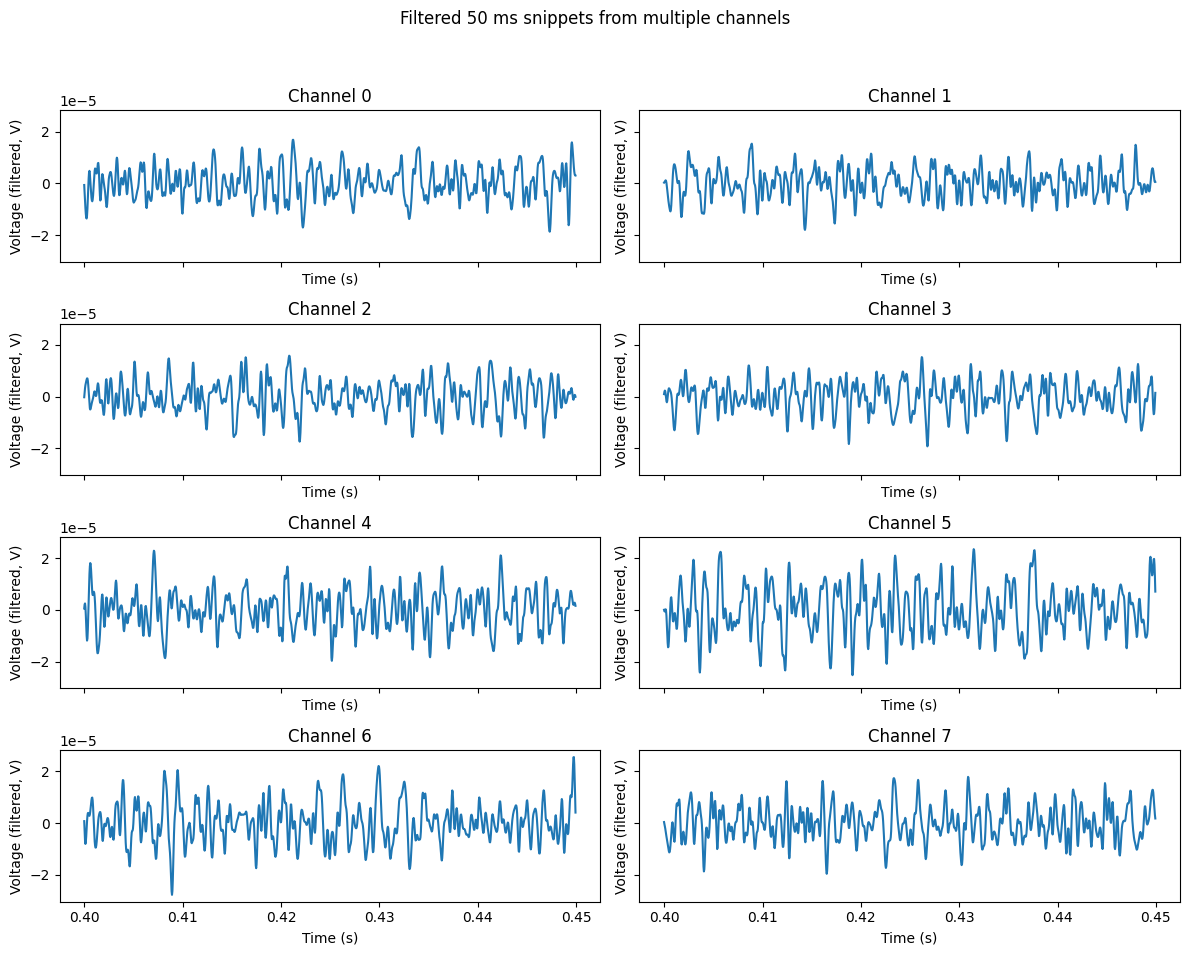

In [3]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def bandpass_filter(data, lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

data = nwb.acquisition["ElectricalSeries"].data
rate = nwb.acquisition["ElectricalSeries"].rate

start_sec = 0.4  # middle segment
win_sec = 0.05  # 50 ms
start_idx = int(start_sec * rate)
end_idx = int((start_sec + win_sec) * rate)

channels_to_plot = 8
fig, axs = plt.subplots(channels_to_plot // 2, 2, figsize=(12, 10), sharex=True, sharey=True)
axs = axs.flatten()

times = np.arange(start_idx, end_idx) / rate

for ch in range(channels_to_plot):
    snippet = data[start_idx:end_idx, ch][:]
    filtered = bandpass_filter(snippet, 300, 3000, rate)
    axs[ch].plot(times, filtered)
    axs[ch].set_title(f"Channel {ch}")
    axs[ch].set_xlabel("Time (s)")
    axs[ch].set_ylabel("Voltage (filtered, V)")

plt.suptitle("Filtered 50 ms snippets from multiple channels")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Interpretation:**  
This multi-panel plot illustrates filtered segments across 8 channels.  
While clear spikes may not be visible, the plot provides a quick overview of extracellular signal variability in this Dandiset's recordings.

For more advanced analyses (e.g., spike sorting, LFP extraction, or stimulus-specific averaging), further domain-specific and computational methods would be required **outside the scope of this notebook.**

# Summary

This notebook demonstrates:
- How to access a large neurophysiology Dandiset via DANDI API
- How to stream and explore an NWB file without full download
- Basic visualization of multi-electrode extracellular signals

This is meant as a **starting point** for researchers to perform deeper analyses tailored to their scientific questions.